# FIT5202 Assignment 1 : Analysing eCommerce Data

## Table of Contents
* 
    * [Part 1 : Working with RDD](#part-1)
        * [1.1 Data Preparation and Loading](#1.1)
        * [1.2 Data Partitioning in RDD](#1.2)
        * [1.3 Query/Analysis](#1.3)
    * [Part 2 : Working with DataFrames](#2-dataframes)
        * [2.1 Data Preparation and Loading](#2-dataframes)
        * [2.2 Query/Analysis](#2.2)
    * [Part 3 :  RDDs vs DataFrame vs Spark SQL](#part-3)

# Part 1 : Working with RDDs <a class="anchor" name="part-1"></a>
## 1.1 Working with RDD
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for retail analysis. 

### 1.1.1 Data Preparation and Loading <a class="anchor" name="1.1"></a>
Write the code to create a SparkContext object using SparkSession. To create a SparkSession you first need to build a SparkConf object that contains information about your application, use Melbourne time as the session timezone. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 

In [2]:
# Import SparkConf class into program
from pyspark import SparkConf
# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
##############################################
app_name = "Assingment1_Rdd_Dataframes_Sql"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from datetime import datetime 
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, TimestampType, LongType,DecimalType
from pyspark.sql.functions import col,to_date,hour ,to_timestamp

################################################

# Method 1: Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).config("spark.sql.session.timezone","Austraila/Melbourne").getOrCreate()
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")
sc = spark.sparkContext
sc.setLogLevel('ERROR')


1.1.2 Load CUPS csv files into four RDDs.

In [3]:
#Loading cups into RDDs
category_rdd=sc.textFile('category.csv')
users_rdd = sc.textFile('users.csv')
product_rdd=sc.textFile('product.csv')
sales_rdd=sc.textFile('sales.csv')


1.1.3 For each RDD, remove the header rows and display the total count and first 10 records. (Hint: You can use csv.reader to parse rows into RDDs.)

In [4]:

#category
category_rdd= sc.textFile('category.csv', use_unicode=True)
header_category= category_rdd.first()
category_rdd1= category_rdd.filter(lambda x:x !=header_category)
# Split each line by comma 
category_key_value_rdd = category_rdd1.map(lambda line: line.split(','))
print(f" Total count for category {category_rdd1.count()}")
for category in category_rdd1.take(10):
    print(category)
    
    
#users
users_rdd=sc.textFile('users.csv',use_unicode=True)
header_users=users_rdd.first()
users_rdd1=users_rdd.filter(lambda x:x !=header_users)
# Split each line by comma 
split_users_rdd = users_rdd1.map(lambda line: line.split(','))
print(f"\n Total count for user {users_rdd1.count()}")
for user in users_rdd1.take(10):
    print(user)


#product
product_rdd= sc.textFile('product.csv', use_unicode=True)
header_product= product_rdd.first()
product_rdd1= product_rdd.filter(lambda x:x !=header_product)
# Split each line by comma 
product_key_value_rdd = product_rdd.map(lambda line: line.split(','))
print(f" \n Total count of product {product_rdd1.count()}")
for product in product_rdd1.take(10):
    print(product)


#sales
sales_rdd= sc.textFile('sales.csv', use_unicode=True)
header_sales= sales_rdd.first()
# Split each line by comma 
sales_rdd1= sales_rdd.filter(lambda x:x !=header_sales)
sales_key_value_rdd = sales_rdd1.map(lambda line: line.split(','))
print(f" \n Total count of sales {sales_rdd1.count()}")
for sales in sales_rdd1.take(10):
    print(sales)


 Total count for category 1464
2090971686529663114,appliances.environment.vacuum
2232732116498514828,apparel.jeans
2232732109628244704,apparel.shirt
2232732103294845523,apparel.shoes.step_ins
2232732086500851925,apparel.scarf
2232732100660822557,country_yard.cultivator
2053013558282682943,construction.tools.drill
2053013562527318829,furniture.living_room.cabinet
2110937143172923797,construction.tools.light
2074462942123786261,kids.toys

 Total count for user 1048575
514771925,MERVYN,Unknown,1/05/1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL
531947692,FALLON,Unknown,16/10/2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE
560231306,KALIN,Unknown,19/08/2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN
575248835,PIETTA,Unknown,19/01/1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON
575243330,SUMMAH,Unknown,19/04/1973,44 CLARENDON ROAD,2048,NSW,female,STANMORE
516606243,KEIRA,Unknown,9/06/2011,1 VIOLA CLOSE,4868,QLD,female,BAYVIEW HEIGHTS
545807768,VERITY,Unknown,1/02/1980,31-33 KING STREET,3550

1.1.4 Drop unnecessary columns from RDDs: firstname, lastname, user_session.

In [102]:
# Drop unnecessary columns (firstname, lastname, user_session) from users RDD
#users contains only firstname, lastname
users_rdd_drop = users_rdd1.map(lambda line: ','.join(line.split(',')[0:1] + line.split(',')[3:])) 
# Keep user_id, dob, address, postcode, state, sex, suburb
print("Sample rows from users_rdd_cleaned:")
for row in users_rdd_drop.take(5):
    print(row)  
    
    
# Drop unnecessary columns (firstname, lastname, user_session) from sales RDD
#sales contains user_session
sales_rdd_drop = sales_rdd1.map(lambda line: ','.join(line.split(',')[:-1]))
print("Sample rows from sales_rdd_cleaned:")
for row in sales_rdd_drop.take(5):
    print(row)  # Print a few sample rows


Sample rows from users_rdd_cleaned:
514771925,1/05/1963,30A LUCINDA AVENUE,2260,NSW,male,WAMBERAL
531947692,16/10/2002,82 CAMBERWARRA DRIVE,6025,WA,female,CRAIGIE
560231306,19/08/2015,74 SOLDIERS ROAD,2281,NSW,male,PELICAN
575248835,19/01/1962,"UNIT 1, 1 LARK AVENUE",5023,SA,female,SEATON
575243330,19/04/1973,44 CLARENDON ROAD,2048,NSW,female,STANMORE
Sample rows from sales_rdd_cleaned:
338156802,2020-03-27 02:03:48.000000 +00:00,4804056,171.56,513119357
338156808,2020-03-27 02:03:49.000000 +00:00,1005223,209.53,522277649
338156913,2020-03-27 02:04:11.000000 +00:00,1005212,174.25,632847510
338156921,2020-03-27 02:04:13.000000 +00:00,1005236,231.15,626579483
338156953,2020-03-27 02:04:18.000000 +00:00,1005212,174.25,633245502


### 1.2 Data Partitioning in RDD <a class="anchor" name="1.2"></a>
1.2.1 For each RDD, print out the total number of partitions and the number of records in each partition. Answer the following questions: How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? Can you explain why it will be partitioned in this number? If I only have one single core CPU in my PC, what is the default partition's number? (Hint: search the Spark source code to try to answer this question.) Write code and your explanation in Markdown cells.

In [109]:
def print_partition(rdd, rdd_name):
    numPartitions = rdd.getNumPartitions()
    partition_record_count = rdd.glom().map(len).collect()
    
    print(rdd_name)
    print(f"\n Total partitions: {numPartitions}")
    for index, Num_record in enumerate(partition_record_count):
        print(f" Number of records in Partition {index + 1} ====: {Num_record}")
print_partition(category_rdd1, "Category RDD")
print_partition(users_rdd1, "Users RDD")
print_partition(product_rdd1, "Product RDD")
print_partition(sales_rdd1, "Sales RDD")


Category RDD

 Total partitions: 2
 Number of records in Partition 1 ====: 647
 Number of records in Partition 2 ====: 817
Users RDD

 Total partitions: 3
 Number of records in Partition 1 ====: 399233
 Number of records in Partition 2 ====: 399308
 Number of records in Partition 3 ====: 250034
Product RDD

 Total partitions: 2
 Number of records in Partition 1 ====: 104192
 Number of records in Partition 2 ====: 104098
Sales RDD

 Total partitions: 22
 Number of records in Partition 1 ====: 315832
 Number of records in Partition 2 ====: 315940
 Number of records in Partition 3 ====: 316009
 Number of records in Partition 4 ====: 319748
 Number of records in Partition 5 ====: 319808
 Number of records in Partition 6 ====: 319827
 Number of records in Partition 7 ====: 319861
 Number of records in Partition 8 ====: 319855
 Number of records in Partition 9 ====: 317174
 Number of records in Partition 10 ====: 316760
 Number of records in Partition 11 ====: 316656
 Number of records in Pa

###
How many partitions do the above RDDs have? 
Total partitions for category: 2 
Total partitions for users: 39 
Total partitions for product: 2 
Total partitions for sales: 22 
###
How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy?----------
    Spark uses a default mechanism if any partitioning strategy is not specify explicitly which depends on the available number of CPU cores in the cluster.Oftenly a hash-based strategy is used which partition data based on a key or hash value.
### 
Can you explain why it will be partitioned in this number?--------------------
The goal of partitioning is to make best use of available resource.As local [*] is used in spark conf it will run spark locally 
with as many processors as logical cores on your machine.The default number of partitions is determined by the total number of available CPU cores and it also depends on how we are reading data from file.
###
 If I only have one single core CPU in my PC, what is the default partition's number? ---------------
Default partition in spark is based on number of available cores . If there is only single core CPU the default partititon will be 1

1.2.2. Create a user defined function (UDF) to transform category_code to capitalized words. (e.g. apparel.shoes.ballet_shoes shall be converted to “Apparel Shots Ballet_shoes).

In [110]:
def transform_category(category_code):
    categories = category_code.split('.')
    transformed_categories = [category.capitalize() for category in categories]
    return ' '.join(transformed_categories)
category_split_rdd = category_rdd1.map(lambda line: line.split(','))
transformed_category_rdd = category_split_rdd.map(lambda x: (x[0], transform_category(x[1])))
sample_transformed_categories = transformed_category_rdd.take(10)
for category_id, transformed_category in sample_transformed_categories:
    print(f"Category ID: {category_id}, Transformed Category: {transformed_category}")

Category ID: 2090971686529663114, Transformed Category: Appliances Environment Vacuum
Category ID: 2232732116498514828, Transformed Category: Apparel Jeans
Category ID: 2232732109628244704, Transformed Category: Apparel Shirt
Category ID: 2232732103294845523, Transformed Category: Apparel Shoes Step_ins
Category ID: 2232732086500851925, Transformed Category: Apparel Scarf
Category ID: 2232732100660822557, Transformed Category: Country_yard Cultivator
Category ID: 2053013558282682943, Transformed Category: Construction Tools Drill
Category ID: 2053013562527318829, Transformed Category: Furniture Living_room Cabinet
Category ID: 2110937143172923797, Transformed Category: Construction Tools Light
Category ID: 2074462942123786261, Transformed Category: Kids Toys


1.2.3. Join Product and Category RDDs and Create a new key value RDD, using brand as the key and all of the categories of that brand as the value. Print out the first 5 records of the key-value RDD.

In [10]:
product_category_rdd = product_key_value_rdd \
    .map(lambda x: (x[1], (x[2], x[3]))) \
    .join(category_key_value_rdd.map(lambda x: (x[0], x[1])))
brand_categories_rdd = product_category_rdd \
    .map(lambda x: (x[1][0][0], x[1][1])) \
    .groupByKey() \
    .mapValues(list)
for record in brand_categories_rdd.take(5):
    print(record)

('', ['furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.bed', 'furniture.bedroom.

### 1.3 Query/Analysis <a class="anchor" name="1.3"></a>
For this part, write relevant RDD operations to answer the following queries.

**1.3.1 Calculate the average daily sales for each year, each month. Print the results as the following format(see assignment specification).**

In [112]:
daily_total_rdd = sales_rdd1.map(lambda line: line.split(',')) \
    .filter(lambda values: len(values) == 6 and values[3] != 'price') \
    .map(lambda values: (values[1][:7], float(values[3])))
daily_total_rdd = daily_total_rdd.reduceByKey(lambda x, y: x + y)
average_daily_sales_rdd = daily_total_rdd.mapValues(lambda total: total / 30)  
results = average_daily_sales_rdd.collect()
print("+----+-----+---------------------------+")
print("|Year|Month| Avg Daily Sales           |")
print("+----+-----+---------------------------+")
for year_month, avg_sales in sorted(results):
    year, month = year_month.split('-')
    formatted_avg_sales = f"{avg_sales:.20f}"
    print(f"|{year}|   {month}|{formatted_avg_sales}|")

print("+----+-----+----------------------------------")


+----+-----+---------------------------+
|Year|Month| Avg Daily Sales           |
+----+-----+---------------------------+
|2019|   10|7665250.07566686626523733139|
|2019|   11|9173163.01666434668004512787|
|2019|   12|11472560.97133354283869266510|
|2020|   01|8701162.33666620217263698578|
|2020|   02|12705964.51400041766464710236|
|2020|   03|10712613.61066734790802001953|
|2020|   04|8150859.73700171802192926407|
+----+-----+----------------------------------


**1.3.2 Find 10 of the best selling brands. You should display the brand and total revenue in the result.**

In [113]:
product_brand_rdd = product_key_value_rdd.map(lambda x: (x[0], x[2]))
sales_price_rdd = sales_key_value_rdd.map(lambda x: (x[2], float(x[3])))
brand_price_rdd = product_brand_rdd.join(sales_price_rdd).map(lambda x: (x[1][0], x[1][1]))
brand_revenue_rdd = brand_price_rdd.reduceByKey(lambda x, y: x + y)

# Get the top 10 best selling brands by revenue
top_brands = brand_revenue_rdd.takeOrdered(10, key=lambda x: -x[1])
print("+------------------+------------------+")
print("|      Brand       |    Total Revenue |")
print("+------------------+------------------+")
for (brand, revenue) in top_brands:
    print(f"|{brand:18}|{revenue:18.2f}|")
print("+------------------+------------------+")


+------------------+------------------+
|      Brand       |    Total Revenue |
+------------------+------------------+
|apple             |     1846051463.73|
|samsung           |      786833558.91|
|                  |      303458503.86|
|xiaomi            |      175269314.73|
|huawei            |       80182987.27|
|lg                |       73917724.57|
|lucente           |       54369150.00|
|sony              |       53442507.92|
|acer              |       53330141.39|
|oppo              |       51687235.69|
+------------------+------------------+


## Part 2. Working with DataFrames <a class="anchor" name="2-dataframes"></a>
In this section, you will need to load the given datasets into PySpark DataFrames and use DataFrame functions to answer the queries.
### 2.1 Data Preparation and Loading

**2.1.1. Load CUPS into four separate dataframes. When you create your dataframes, please refer to the metadata file and think about the appropriate data type for each columns (Note: Initially, you should read date/time related column as the string type).**

In [114]:
category_df = spark.read.csv("category.csv", header=True)
category_df_fixed = category_df.withColumn("category_id", col("category_id").cast("long"))
category_df_fixed.show(5)


#users
users_df = spark.read.csv("users.csv", header=True)
users_df_fixed = users_df \
    .withColumn("user_id", col("user_id").cast(LongType())) \
    .withColumn("postcode", col("postcode").cast(IntegerType()))
users_df_fixed.show(5)

#product
product_df = spark.read.csv("product.csv", header=True)
product_df_fixed = product_df \
    .withColumn("product_id", col("product_id").cast("long")) \
    .withColumn("category_id", col("category_id").cast("long")) \
    .withColumn("avg_cost", col("avg_cost").cast(DecimalType(precision=15, scale=4)))
product_df_fixed.show(5)

#sales
sales_df = spark.read.csv("sales.csv", header=True)
sales_df_fixed = sales_df \
    .withColumn("id", col("id").cast(LongType())) \
    .withColumn("sales_timestamp", col("sales_timestamp").cast(StringType())) \
    .withColumn("product_id", col("product_id").cast(LongType())) \
    .withColumn("price", col("price").cast(DoubleType())) \
    .withColumn("user_id", col("user_id").cast(LongType())) \
    .withColumn("user_session", col("user_session").cast(StringType()))
sales_df_fixed.show(5)

+-------------------+--------------------+
|        category_id|       category_code|
+-------------------+--------------------+
|2090971686529663114|appliances.enviro...|
|2232732116498514828|       apparel.jeans|
|2232732109628244704|       apparel.shirt|
|2232732103294845523|apparel.shoes.ste...|
|2232732086500851925|       apparel.scarf|
+-------------------+--------------------+
only showing top 5 rows

+---------+---------+--------+----------+--------------------+--------+-----+------+--------+
|  user_id|firstname|lastname|       dob|             address|postcode|state|   sex|  suburb|
+---------+---------+--------+----------+--------------------+--------+-----+------+--------+
|514771925|   MERVYN| Unknown| 1/05/1963|  30A LUCINDA AVENUE|    2260|  NSW|  male|WAMBERAL|
|531947692|   FALLON| Unknown|16/10/2002|82 CAMBERWARRA DRIVE|    6025|   WA|female| CRAIGIE|
|560231306|    KALIN| Unknown|19/08/2015|    74 SOLDIERS ROAD|    2281|  NSW|  male| PELICAN|
|575248835|   PIETTA| Un

**2.1.2 Display the schema of the four dataframes.**

In [115]:
category_df_fixed.printSchema()
users_df_fixed.printSchema()
product_df_fixed.printSchema()
sales_df_fixed.printSchema()

root
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)

root
 |-- user_id: long (nullable = true)
 |-- firstname: string (nullable = true)
 |-- lastname: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- address: string (nullable = true)
 |-- postcode: integer (nullable = true)
 |-- state: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- suburb: string (nullable = true)

root
 |-- product_id: long (nullable = true)
 |-- category_id: long (nullable = true)
 |-- brand: string (nullable = true)
 |-- avg_cost: decimal(15,4) (nullable = true)

root
 |-- id: long (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: long (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_session: string (nullable = true)



### 2.2 QueryAnalysis  <a class="anchor" name="2.2"></a>
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.   

**2.2.1. Transform the 'sales_time' column in the sales dataframe to the date type; extract the hour in sales_date and create a new column “sales_hour”; after that, show the schema.**

In [116]:
sales_df = sales_df_fixed.withColumn("sales_date", to_date(col("sales_timestamp"), "yyyy-MM-dd HH:mm:ss"))
sales_df = sales_df.withColumn("sales_hour", hour(col("sales_timestamp")))
sales_df.printSchema()
sales_df.show()


root
 |-- id: long (nullable = true)
 |-- sales_timestamp: string (nullable = true)
 |-- product_id: long (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_session: string (nullable = true)
 |-- sales_date: date (nullable = true)
 |-- sales_hour: integer (nullable = true)

+---------+--------------------+----------+------+---------+--------------------+----------+----------+
|       id|     sales_timestamp|product_id| price|  user_id|        user_session|sales_date|sales_hour|
+---------+--------------------+----------+------+---------+--------------------+----------+----------+
|338156802|2020-03-27 02:03:...|   4804056|171.56|513119357|0ad58441-9db9-48b...|2020-03-27|         2|
|338156808|2020-03-27 02:03:...|   1005223|209.53|522277649|2ecb2725-2c40-4ac...|2020-03-27|         2|
|338156913|2020-03-27 02:04:...|   1005212|174.25|632847510|43609582-1818-488...|2020-03-27|         2|
|338156921|2020-03-27 02:04:...|   1005236|231.15|

**2.2.2. Calculate total sales for each hour, sort your result based on each hour’s sales in a descending order. Print out the sales_hour and total_sales columns.**

In [117]:
from pyspark.sql.functions import col, sum, format_number
hourly_sales = sales_df.groupBy("sales_hour").agg(sum("price").alias("total_sales"))
sorted_hourly_sales = hourly_sales.orderBy(col("total_sales").desc())
total_hourly_sales = sorted_hourly_sales.withColumn("Total_Sales", format_number("total_sales", 2))
total_hourly_sales.select("sales_hour", "Total_Sales").show()


+----------+--------------+
|sales_hour|   Total_Sales|
+----------+--------------+
|         9|154,145,024.48|
|         8|152,052,630.88|
|        10|148,623,811.53|
|         7|143,124,950.34|
|        11|137,410,186.46|
|         6|134,751,533.59|
|        12|126,256,798.36|
|         5|120,775,359.79|
|        13|118,246,078.86|
|        14|111,314,800.27|
|        15|103,746,572.21|
|         4| 97,912,731.75|
|        16| 95,785,639.27|
|        17| 87,624,536.76|
|        18| 73,462,844.84|
|         3| 63,957,611.31|
|        19| 54,797,895.47|
|        20| 35,462,324.35|
|         2| 27,785,862.89|
|        21| 22,917,920.41|
+----------+--------------+
only showing top 20 rows



**2.2.3.Find 10 most profitable categories (profit can be simply defined as price - avg_cost). Print out the category name and total profit. Please print the category name in capitalized word format(hint: you can reuse the UDF defined in part 1.)**

In [118]:
# Register the UDF
transform_category_udf = udf(transform_category, StringType())
sales_profit = sales_df.join(product_df, "product_id").withColumn("profit", col("price") - col("avg_cost"))
profitable_categories_df = sales_profit.join(category_df, "category_id").select("category_code", "profit")
profitable_categories_df = profitable_categories_df.withColumn("Category_Name", transform_category_udf(col("category_code")))
agg_df = profitable_categories_df.groupBy("Category_Name").sum("profit").withColumnRenamed("sum(profit)", "Total_profit")
top_10_profitable_categories_df = agg_df.orderBy(col("Total_profit").desc()).limit(10)
top_10_profitable_categories_df.show(truncate=False)


+--------------------------------+-------------------+
|Category_Name                   |Total_profit       |
+--------------------------------+-------------------+
|Construction Tools Light        |5.812833389241414E7|
|Others                          |1.437661394336436E7|
|Appliances Kitchen Refrigerators|6037513.868983626  |
|Appliances Personal Massager    |5451166.058429802  |
|Computers Notebook              |3514810.3210702483 |
|Electronics Audio Headphone     |3228578.0998448352 |
|Appliances Kitchen Washer       |2998500.5892523294 |
|Appliances Environment Vacuum   |2135828.0017644227 |
|Stationery Cartrige             |1931292.7781734173 |
|Electronics Clocks              |1662857.1804788515 |
+--------------------------------+-------------------+



**2.2.4. Use DataFrame filters to find all transactions sold at loss (defined as price < avg_cost), calculate 10 worst loss margin in percentage. (margin is defined as (price - avg_cost)/avg_cost; if price - avg_cost > 0, it’s call a profit margin; otherwise a loss margin)**

In [119]:
combined_df = sales_df.join(product_df, "product_id")
combined_df = combined_df.withColumn("margin", (col("price") - col("avg_cost")) / col("avg_cost"))
loss_df = combined_df.filter(col("price") < col("avg_cost"))
worst_loss_df = loss_df.orderBy(col("margin")).limit(10)
worst_loss_df.select("product_id", "price", "avg_cost", "margin").show()


+----------+-----+----------------+-------------------+
|product_id|price|        avg_cost|             margin|
+----------+-----+----------------+-------------------+
|   2602040| 4.61|608.708523068662|-0.9924265887115236|
|   2602040| 4.61|608.708523068662|-0.9924265887115236|
|   2602040| 4.61|603.004942713666|-0.9923549548710929|
|   2602040| 4.61|603.004942713666|-0.9923549548710929|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
| 100044809| 5.15| 625.54040177621|-0.9917671185020558|
+----------+-----+----------------+-------------------+



**2.2.5. Draw a barchart to show total sales from different states in each year.**

<Figure size 1200x600 with 0 Axes>

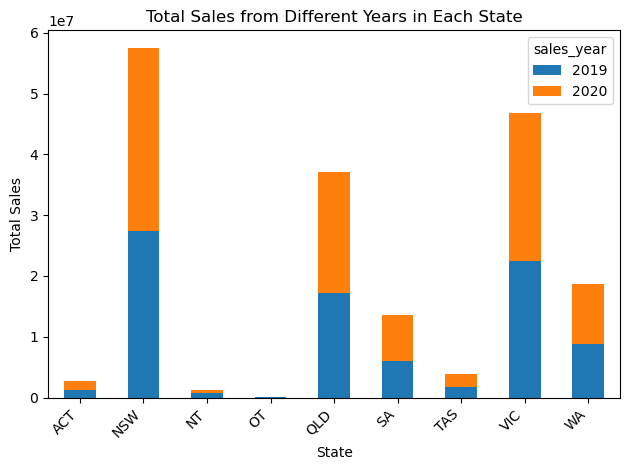

In [120]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import year
sales_df = sales_df.withColumn('sales_year', year('sales_timestamp'))
sales_df_with_state = sales_df.join(users_df, sales_df.user_id == users_df.user_id).select(sales_df.sales_year, users_df.state, sales_df.price)
sales_by_state_year = sales_df_with_state.groupBy('sales_year', 'state').sum('price')


sales_by_state_year_pd = sales_by_state_year.toPandas()
pivot_table = sales_by_state_year_pd.pivot(index='state', columns='sales_year', values='sum(price)')
plt.figure(figsize=(12, 6))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("Total Sales from Different Years in Each State")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**2.2.6. Draw a scatter plot of customer age and their total spending with MOTH. To limit the number of datapoints, you may show the top 1000 “most valuable” customers only. You may also use log scale for the XY axis.**

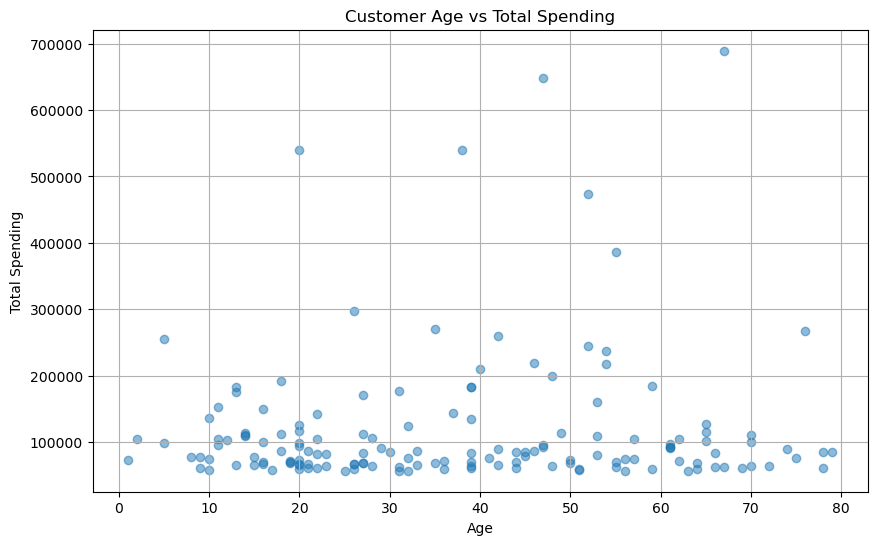

In [126]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, to_date
import matplotlib.pyplot as plt

from pyspark.sql.functions import col, sum
users_df = users_df.withColumn("dob", to_date(col("dob"), "dd/MM/yyyy"))
users_df = users_df.withColumn("birth_year", year(col("dob")))
current_year = year(current_date())
users_df = users_df.withColumn("age", current_year - col("birth_year"))
customer_spending = sales_df.groupBy("user_id").agg(sum("price").alias("total_spending"))
sorted_customers = customer_spending.orderBy(col("total_spending").desc())
top_1000_customers = sorted_customers.limit(1000)
customer_spending_age = top_1000_customers.join(users_df, "user_id")
pandas_df = customer_spending_age.select("age", "total_spending").toPandas()
#scattered plot
plt.figure(figsize=(10, 6))
plt.scatter(pandas_df["age"], pandas_df["total_spending"], alpha=0.5)
plt.title("Customer Age vs Total Spending")
plt.xlabel("Age")
plt.ylabel("Total Spending")
plt.grid(True)
plt.show()



#### Query: Find top 100 most popular products (by total sales) among user age group 20-40, group by brand, and show total sales revenue of each brand.

#### 3.1. RDD Implementation

In [123]:
from pyspark import SparkConf, SparkContext
from datetime import datetime
def parse_sales(line):
    fields = line.split(',')
    try:
        user_id = int(fields[4])
        price = float(fields[3])
        product_id = int(fields[2])
        return (user_id, (price, product_id))
    except:
        return None
def parse_users(line):
    fields = line.split(',')
    try:
        user_id = int(fields[0])
        dob = fields[3]
        dob_year = datetime.strptime(dob, '%d/%m/%Y').year
        return (user_id, dob_year)
    except:
        return None
def parse_products(line):
    fields = line.split(',')
    try:
        product_id = int(fields[0])
        brand = fields[2]
        return (product_id, brand)
    except:
        return None
parsed_products_rdd = product_rdd.filter(lambda x: 'product_id,category_id,brand,avg_cost' not in x)\
                            .map(parse_products)
filtered_products_rdd = parsed_products_rdd.filter(lambda x: x is not None)
brand_sales_rdd = product_sales_rdd.join(filtered_products_rdd)\
                                   .map(lambda x: (x[1][1], x[1][0]))
brand_total_sales_rdd = brand_sales_rdd.reduceByKey(lambda a, b: a + b)
sorted_brand_sales_rdd = brand_total_sales_rdd.sortBy(lambda x: x[1], ascending=False)
top_100_brands_rdd = sorted_brand_sales_rdd.take(100)
for result in top_100_brands_rdd:
    print("Brand:", result[0], "Total Sales Revenue:", result[1])


Brand: apple Total Sales Revenue: 41510505.27
Brand: samsung Total Sales Revenue: 22294341.279999997
Brand:  Total Sales Revenue: 10503376.15
Brand: xiaomi Total Sales Revenue: 5455808.83
Brand: lg Total Sales Revenue: 2875582.9800000004
Brand: oppo Total Sales Revenue: 2385458.39
Brand: huawei Total Sales Revenue: 2247370.2399999998
Brand: lucente Total Sales Revenue: 1727212.9699999997
Brand: acer Total Sales Revenue: 1416431.3699999996
Brand: sony Total Sales Revenue: 1190209.2599999998
Brand: artel Total Sales Revenue: 1025147.7999999999
Brand: lenovo Total Sales Revenue: 926283.66
Brand: bosch Total Sales Revenue: 845495.76
Brand: asus Total Sales Revenue: 619306.3399999999
Brand: cordiant Total Sales Revenue: 606391.52
Brand: hp Total Sales Revenue: 522068.35000000003
Brand: philips Total Sales Revenue: 448035.8600000001
Brand: indesit Total Sales Revenue: 415364.86000000004
Brand: redmond Total Sales Revenue: 407359.57999999996
Brand: beko Total Sales Revenue: 343488.2
Brand: ha

#### 3.2. DataFrame Implementation

In [124]:
%%time
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import to_date, year, current_date, col

start_time = time.time()
users_df = users_df.withColumn("dob", to_date(col("dob"), "dd/MM/yyyy"))
users_df = users_df.withColumn("year", year(col("dob")))
user_df_with_age = users_df.withColumn("age", year(current_date()) - col("year"))
filtered_users = user_df_with_age.filter((col("age") >= 20) & (col("age") <= 40))
sales_products_joined = sales_df.join(product_df, on="product_id", how="inner")
sales_users_products_joined = sales_products_joined.join(filtered_users, on="user_id", how="inner")
brand_sales = sales_users_products_joined.groupBy("brand").agg(sum("price").alias("total_revenue"))
sorted_brand_sales = brand_sales.orderBy(col("total_revenue").desc())

sorted_brand_sales.show(100, truncate=False)


+----------+-------------------+
|brand     |total_revenue      |
+----------+-------------------+
|apple     |5.240140707999993E7|
|samsung   |2.280010296999986E7|
|null      |8738414.449999996  |
|xiaomi    |5040743.209999999  |
|lg        |2393834.3499999987 |
|huawei    |2300984.1399999997 |
|lucente   |1762696.66         |
|oppo      |1611699.870000003  |
|sony      |1388252.36         |
|acer      |1331859.8500000006 |
|lenovo    |1132279.5999999999 |
|bosch     |717411.41          |
|asus      |665500.1699999999  |
|hp        |598836.92          |
|artel     |568341.2799999997  |
|indesit   |462127.5400000001  |
|dauscher  |376914.7899999997  |
|haier     |371272.93          |
|beko      |289423.9799999999  |
|midea     |241640.21000000002 |
|vivo      |220664.31          |
|philips   |219606.57999999996 |
|canon     |214035.75          |
|pulser    |204070.88999999996 |
|janome    |190475.19999999995 |
|karcher   |179760.02999999997 |
|cordiant  |165231.7699999999  |
|hansa    

#### 3.3. Spark SQL Implementation

In [125]:
%%time
sales_df.createOrReplaceTempView("sales")
product_df.createOrReplaceTempView("products")
users_df.createOrReplaceTempView("users")


sql_query = """
    SELECT p.brand, SUM(s.price) AS total_revenue
    FROM sales s
    JOIN products p ON s.product_id = p.product_id
    JOIN (
        SELECT user_id
        FROM users
        WHERE YEAR(current_date()) - YEAR(dob) BETWEEN 20 AND 40
    ) u ON s.user_id = u.user_id
    GROUP BY p.brand
    ORDER BY total_revenue DESC
    LIMIT 100
"""
result = spark.sql(sql_query).collect()
for row in result:
    print(row)

Row(brand='apple', total_revenue=52401407.07999993)
Row(brand='samsung', total_revenue=22800102.96999986)
Row(brand=None, total_revenue=8738414.449999996)
Row(brand='xiaomi', total_revenue=5040743.209999999)
Row(brand='lg', total_revenue=2393834.3499999987)
Row(brand='huawei', total_revenue=2300984.1399999997)
Row(brand='lucente', total_revenue=1762696.66)
Row(brand='oppo', total_revenue=1611699.870000003)
Row(brand='sony', total_revenue=1388252.36)
Row(brand='acer', total_revenue=1331859.8500000006)
Row(brand='lenovo', total_revenue=1132279.5999999999)
Row(brand='bosch', total_revenue=717411.41)
Row(brand='asus', total_revenue=665500.1699999999)
Row(brand='hp', total_revenue=598836.92)
Row(brand='artel', total_revenue=568341.2799999997)
Row(brand='indesit', total_revenue=462127.5400000001)
Row(brand='dauscher', total_revenue=376914.7899999997)
Row(brand='haier', total_revenue=371272.93)
Row(brand='beko', total_revenue=289423.9799999999)
Row(brand='midea', total_revenue=241640.21000000

### 3.4 Observe the query execution time among RDD, DataFrame, SparkSQL, which is the fastest and why? (Maximum 500 words.)

#### The execution time for  Sparksql is faster than Dataframe which is faster than RDD.Spark translates your SQL into efficient steps and works faster for small queries they used pre-planned strategies for tasks.In RDD you need to tell every little step for what you want to perform on data.As dataframes are in table format , organised and upgraded version of RDD so they are easy to understand by pyspark.
#### RDD query execution is slow(because there is a lot of detailed instructions we need to provide)

####  Spark SQL query execution is faster it has  quick ways to work with data.
#### Dataframes are organised and faster than RDD and the execution time is almost same as Spark

#### Summary

The time might differ when running on different machines. Overall, the DataFrame and SQL queries run ..Faster.... compared with RDD.



### Some ideas on the comparison

Armbrust, M., Huai, Y., Liang, C., Xin, R., & Zaharia, M. (2015). Deep Dive into Spark SQL’s Catalyst Optimizer. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/13/deep-dive-into-spark-sqls-catalyst-optimizer.html

Damji, J. (2016). A Tale of Three Apache Spark APIs: RDDs, DataFrames, and Datasets. Retrieved September 28, 2017, from https://databricks.com/blog/2016/07/14/a-tale-of-three-apache-spark-apis-rdds-dataframes-and-datasets.html

Data Flair (2017a). Apache Spark RDD vs DataFrame vs DataSet. Retrieved September 28, 2017, from http://data-flair.training/blogs/apache-spark-rdd-vs-dataframe-vs-dataset

Prakash, C. (2016). Apache Spark: RDD vs Dataframe vs Dataset. Retrieved September 28, 2017, from http://why-not-learn-something.blogspot.com.au/2016/07/apache-spark-rdd-vs-dataframe-vs-dataset.html

Xin, R., & Rosen, J. (2015). Project Tungsten: Bringing Apache Spark Closer to Bare Metal. Retrieved September 30, 2017, from https://databricks.com/blog/2015/04/28/project-tungsten-bringing-spark-closer-to-bare-metal.html